In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from tabulate import tabulate

mpl.style.use("fivethirtyeight")

## 1.

Since $k > 1$, we have that $1 - k < 0$ and hence

$$
\left\{ \left|X-\beta\right|\geq k\beta\right\}
=\left\{ \left(1-k\right)\beta<X<\left(1+k\right)\beta\right\} ^{c}
=\left\{ X<\left(1+k\right)\beta\right\} ^{c}.
$$

It follows that

$$
\mathbb{P}(\left|X-\beta\right|\geq k\beta)
=1-F_{X}(\left(1+k\right)\beta-)
=1-F_{X}(\left(1+k\right)\beta)
=e^{-1-k}.
$$

The Chebyshev bound, on the other hand, is $1/k^{2}$.
These are compared below.

Text(0.5, 0, '$k$')

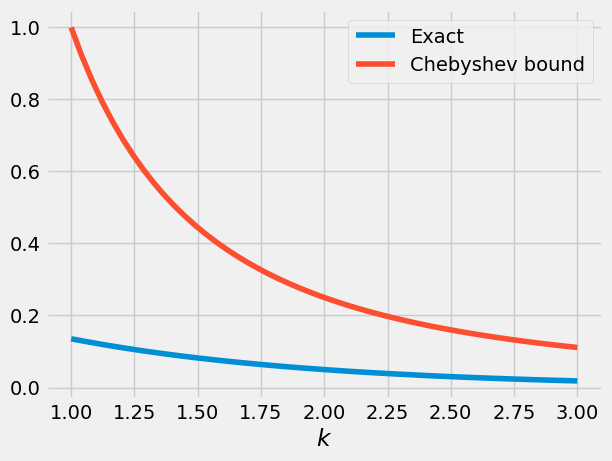

In [48]:
import scipy.stats

beta = 1.

k = np.linspace(1., 3.)
exact = np.exp(-1 - k)
exact_from_cdf = 1. - scipy.stats.expon(scale=beta).cdf((1 + k) * beta)
np.testing.assert_allclose(exact, exact_from_cdf)

plt.plot(k, p, label="Exact")
plt.plot(k, 1. / k**2, label="Chebyshev bound")
plt.legend()
plt.xlabel("$k$")

### 2.

By Chebyshev's inequality with $k=\sqrt{\lambda}$, 

$$
\mathbb{P}(X\geq2\lambda)=\mathbb{P}(X-\lambda\geq\lambda)=\mathbb{P}(\left|X-\lambda\right|\geq\lambda)\leq1/\lambda.
$$

### 3.

First, note that $\mathbb{V}(\overline{X})=\mathbb{V}(X_{1})/n=p(1-p)/n$.
It follows that, by Chebyshev's inequality with $k=\epsilon/\sigma$,

$$
\mathbb{P}(\left|\overline{X}-p\right|\geq\epsilon)\leq\frac{p\left(1-p\right)}{n\epsilon^{2}}\leq\frac{\max_{p}p\left(1-p\right)}{n\epsilon^{2}}=\frac{1}{4n\epsilon^{2}}.
$$

By Theorem 4.5, the Hoeffding bound is $2e^{-2n\epsilon^{2}}$. Since

$$
2e^{-2n\epsilon^{2}}=\frac{2}{e^{2n\epsilon^{2}}}\leq\frac{1}{1/2+n\epsilon^{2}+n^{2}\epsilon^{4}},
$$

it follows that for sufficiently large $n$, the Hoeffding bound is
tighter than the Chebyshev bound.

### 4.

(a) Note that

$$
\left\{ p\in C_{n}\right\} =\left\{ \hat{p}_{n}-\epsilon_{n}<p<\hat{p}_{n}+\epsilon_{n}\right\} =\left\{ \left|\hat{p}_{n}-p\right|<\epsilon_{n}\right\} =\left\{ \left|\hat{p}_{n}-p\right|\geq\epsilon_{n}\right\} ^{c}
$$

and hence, by Theorem 4.5,

$$
\mathbb{P}(p\in C_{n})=1-\mathbb{P}(\left|\hat{p}_{n}-p\right|\geq\epsilon_{n})\geq1-2e^{-2n\epsilon_{n}^{2}}.
$$

(b)

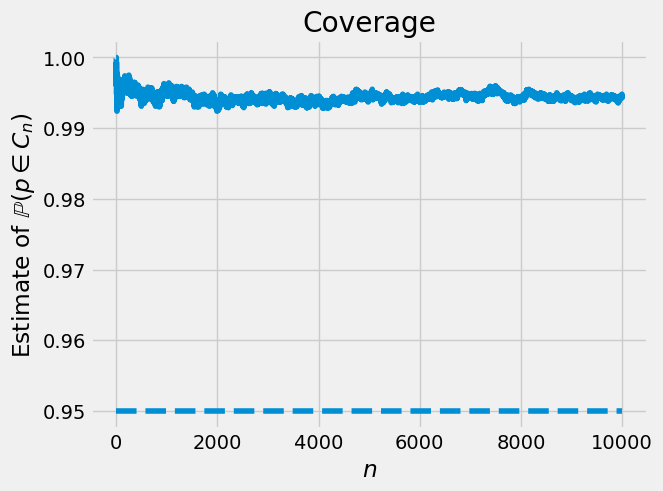

In [68]:
alpha = 0.05
p = 0.4
max_n = 10_000

n = np.arange(1, max_n + 1)
X = np.random.rand(10_000, max_n) < p
p_hat = X.cumsum(axis=1) / n
eps_n = np.sqrt(1. / (2. * n) * np.log(2. / alpha))
count = (np.abs(p_hat - p) < eps_n).mean(axis=0)

plt.plot(n, count)
plt.hlines(1. - alpha, 1, max_n, linestyle="--")
plt.xlabel("$n$")
plt.ylabel("Estimate of $\mathbb{P}(p \in C_n)$")
plt.title("Coverage");

(c) The length of the interval is $2 \epsilon_n$.
By simple algebra, if

$$
n \geq \frac{2}{c^{2}}\log\left(\frac{2}{\alpha}\right),
$$

then $2 \epsilon_n \geq c$.

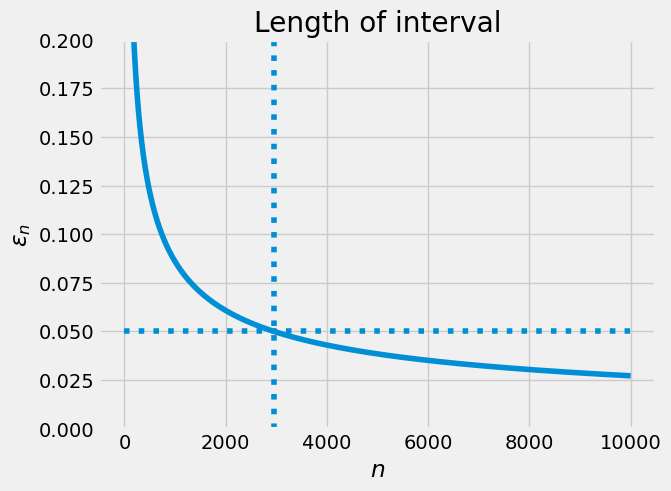

In [80]:
length = 2. * eps_n

desired_length = 0.05
desired_n = 2 * np.log(2. / alpha) / desired_length**2

plt.plot(n, length)
plt.hlines(desired_length, 0., n.max(), linestyle=":")
plt.vlines(desired_n, 0., length.max(), linestyle=":")
plt.ylim(0., 0.2)
plt.title("Length of interval")
plt.xlabel("$n$")
plt.ylabel("$\epsilon_n$");

### 5.

First, note that

$$
\mathbb{P}(\left|Z\right|>t)=2\mathbb{P}(Z>t)=2\mathbb{E}\left[I_{\{Z>t\}}\right]\leq2\mathbb{E}\left[\frac{Z}{t}I_{\{Z>t\}}\right]=\frac{2}{t}\mathbb{E}\left[ZI_{\{Z>t\}}\right].
$$

Moreover,

$$
\mathbb{E}\left[ZI_{\{Z>t\}}\right]=\frac{1}{\sqrt{2\pi}}\int_{t}^{\infty}ze^{-z^{2}/2}=-\frac{1}{\sqrt{2\pi}}e^{-z^{2}/2}\mid_{t}^{\infty}=\frac{1}{\sqrt{2\pi}}e^{-t^{2}/2}.
$$

Putting it all together,

$$
\mathbb{P}(\left|Z\right|>t)\leq\sqrt{\frac{2}{\pi}}\frac{e^{-t^{2}/2}}{t}.
$$

### 6.

Since

$$
\mathbb{P}(|Z| \geq t) = 2 \mathbb{P}(Z \leq -t),
$$

we can plot the desired quantity using the CDF:

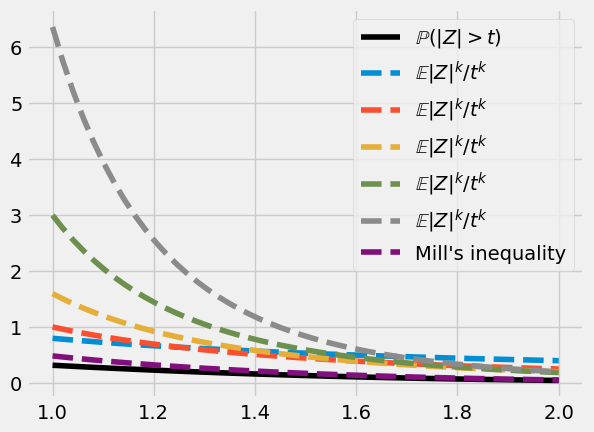

In [36]:
t = np.linspace(1., 2.)
plt.plot(t, 2. * scipy.stats.norm.cdf(-t), label=r"$\mathbb{P}(|Z| > t)$", color="k")
z = np.random.randn(1_000_000)
for k in range(1, 5 + 1):
    plt.plot(t, ((np.abs(z))**k).mean() / t**k, label=r"$\mathbb{E}|Z|^k / t^k$", linestyle="--")
plt.plot(t, np.sqrt(2 / np.pi) * np.exp(-t**2 / 2.) / t, label="Mill's inequality", linestyle="--")
plt.legend();

Note that Mill's inequality is by far tighter than the other bounds.
This is especially true as $t \rightarrow 0$ since the other bounds blow up while Mill's bound vanishes.

### 7.

Since $\overline{X} \sim N(0, 1/n)$, it follows by Mill's inequality that

$$
\mathbb{P}(|\overline{X}|>t)
=\mathbb{P}(|Z|>t\sqrt{n})
\leq\sqrt{\frac{2}{\pi}}\frac{e^{-t^{2}n/2}}{t\sqrt{n}}.
$$

Taking $k=t\sqrt{n}$ in the Chebyshev bound yields

$$
\mathbb{P}(|\overline{X}|\geq t)
\leq\frac{1}{t^{2}n}.
$$

Note that

$$
\frac{e^{-t^{2}n/2}}{t\sqrt{n}}=\frac{1}{t\sqrt{n}e^{t^{2}n/2}}=\frac{1}{t\sqrt{n}\left(1+\frac{1}{2}t^{2}n+\cdots\right)}=\frac{1}{t\sqrt{n}+\frac{1}{2}t^{2}n\sqrt{n}+\cdots}.
$$

In particular, for $n\geq4$, $\frac{1}{2}t^{2}n\sqrt{n}\geq t^{2}n$ and hence Mill's inequality is tighter than the Chebyshev bound for $n \geq 4$.